In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg

In [17]:
image_gray = cv2.imread('sar_1_gray.jpg')

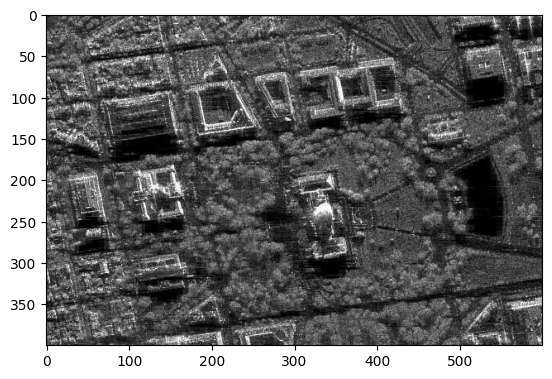

In [18]:
plt.imshow(image_gray)

# 2. Постройте гистограмму

In [19]:
histSize = 256
histRange = (0, 256)
accumulate = False

gray_hist = cv2.calcHist([image_gray], [0], None, [histSize], histRange, accumulate=accumulate)

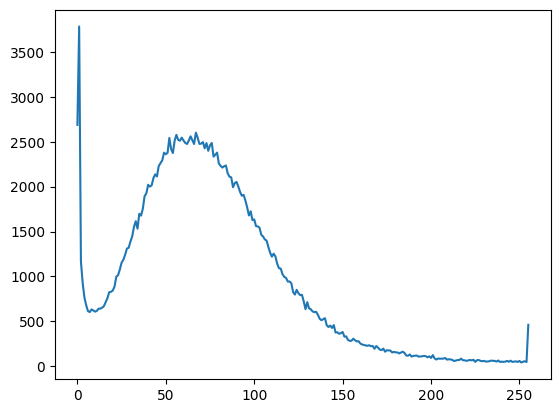

In [20]:
plt.plot(gray_hist)

# 3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1

In [21]:
def gamma_correction(image, gamma):
    image_normalized = image.astype(np.float32) / 255.0
    gamma_corrected = np.power(image_normalized, gamma)
    gamma_corrected = (gamma_corrected * 255).astype(np.uint8)
    return gamma_corrected

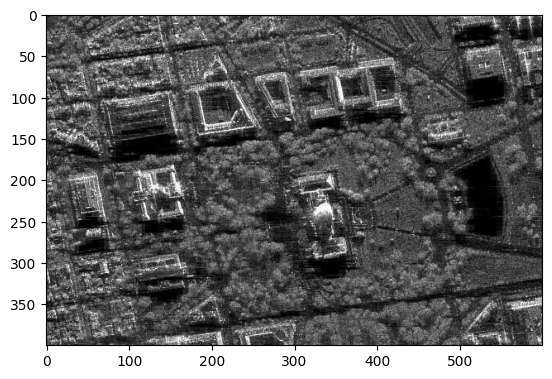

In [22]:
plt.imshow(image_gray)

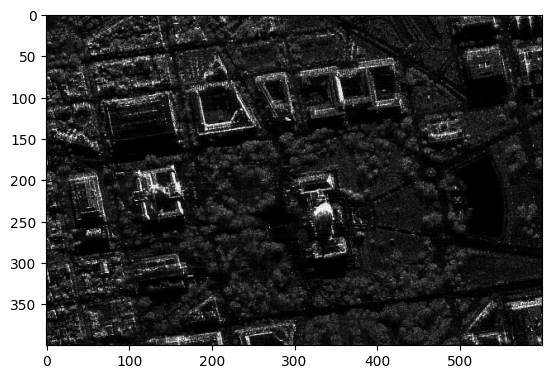

In [23]:
gamma = 2.0
darker_image = gamma_correction(image_gray, gamma)
plt.imshow(darker_image)

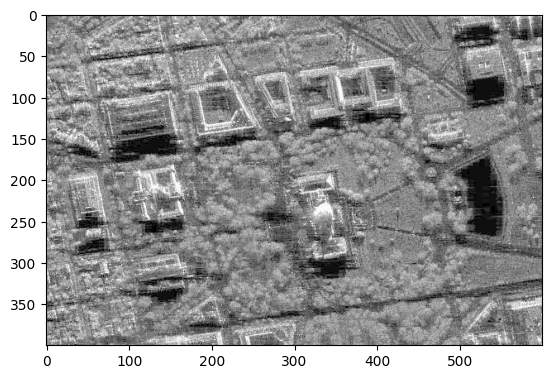

In [24]:
gamma = 0.5
brighter_image = gamma_correction(image_gray, gamma)
plt.imshow(brighter_image)

In [25]:
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра MSE, SSIM

In [26]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, darker_image, full=True, channel_axis=-1)
mse = mean_squared_error(image_gray, darker_image)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))
print("MSE: {}".format(mse))

SSIM: 0.5270459922820344
MSE: 2383.7636375


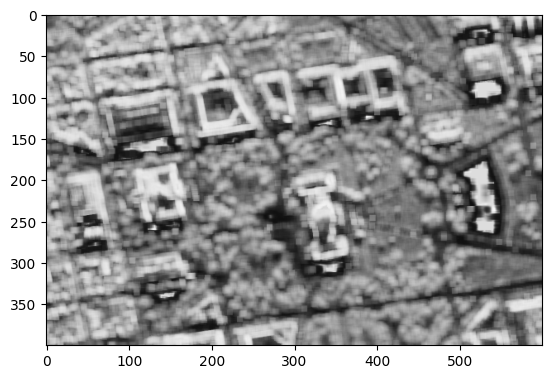

In [27]:
plt.imshow(diff)

In [28]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, brighter_image, full=True, channel_axis=-1)
mse = mean_squared_error(image_gray, brighter_image)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))
print("MSE: {}".format(mse))

SSIM: 0.7875008686792753
MSE: 3250.429145833333


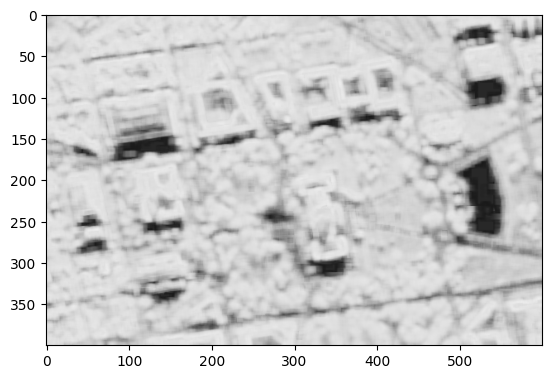

In [29]:
plt.imshow(diff)

# 5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray

Text(0.5, 1.0, 'После')

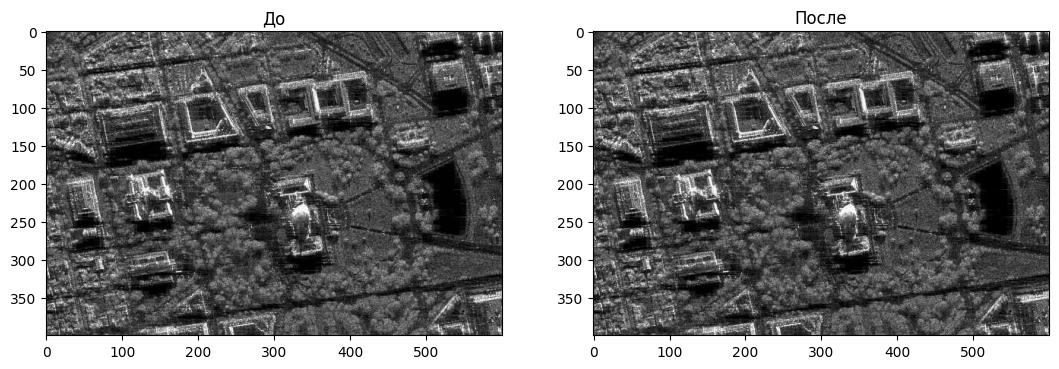

In [30]:
image_gray = cv2.cvtColor(image_gray, cv2.COLOR_BGR2GRAY)
eq_gray = cv2.equalizeHist(image_gray)
min_src = image_gray.min()
max_src = image_gray.max()
min_ref = eq_gray.min()
max_ref = eq_gray.max()
gray_corrected = (image_gray.astype(np.float32) - min_src) * (max_ref - min_ref) / (max_src - min_src + 1e-8) + min_ref
gray_corrected = np.clip(gray_corrected, 0, 255).astype(np.uint8)
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
plt.imshow(image_gray, cmap="gray")
plt.title('До')
plt.subplot(1,3,2)
plt.imshow(gray_corrected, cmap="gray")
plt.title('После')

# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами

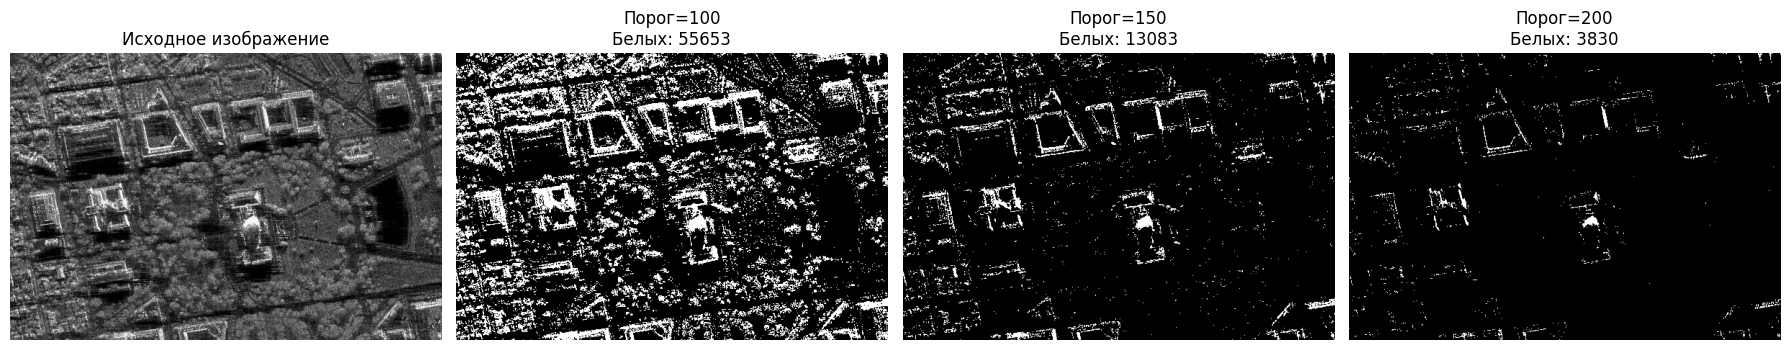

In [31]:
plt.figure(figsize=(18, 12))

# Исходное изображение
plt.subplot(3, 4, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

# Порог 100
_, thresh_100 = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)
plt.subplot(3, 4, 2)
plt.imshow(thresh_100, cmap='gray')
plt.title(f'Порог=100\nБелых: {(thresh_100==255).sum()}')
plt.axis('off')

# Порог 150
_, thresh_150 = cv2.threshold(image_gray, 150, 255, cv2.THRESH_BINARY)
plt.subplot(3, 4, 3)
plt.imshow(thresh_150, cmap='gray')
plt.title(f'Порог=150\nБелых: {(thresh_150==255).sum()}')
plt.axis('off')

# Порог 200
_, thresh_200 = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY)
plt.subplot(3, 4, 4)
plt.imshow(thresh_200, cmap='gray')
plt.title(f'Порог=200\nБелых: {(thresh_200==255).sum()}')
plt.axis('off')

plt.tight_layout()
plt.show()